<a href="https://colab.research.google.com/github/Sachiteltumbade/skills-introduction-to-github/blob/main/Fast_Tag_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
df.dtypes

Transaction_ID            int64
Timestamp                object
Vehicle_Type             object
FastagID                 object
TollBoothID              object
Lane_Type                object
Vehicle_Dimensions       object
Transaction_Amount        int64
Amount_paid               int64
Geographical_Location    object
Vehicle_Speed             int64
Vehicle_Plate_Number     object
Fraud_indicator          object
dtype: object

In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df['FastagID'].value_counts()

FastagID
FTG-001-ABC-121    1
FTG-524-CDE-098    1
FTG-531-ZAS-987    1
FTG-530-LPO-210    1
FTG-528-WSX-876    1
                  ..
FTG-414-HIJ-567    1
FTG-647-KLM-890    1
FTG-880-NOP-123    1
FTG-113-QRS-456    1
FTG-459-WSX-543    1
Name: count, Length: 4451, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
df.shape

(5000, 13)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         5000 non-null   int64         
 1   Timestamp              5000 non-null   datetime64[ns]
 2   Vehicle_Type           5000 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            5000 non-null   object        
 5   Lane_Type              5000 non-null   object        
 6   Vehicle_Dimensions     5000 non-null   object        
 7   Transaction_Amount     5000 non-null   int64         
 8   Amount_paid            5000 non-null   int64         
 9   Geographical_Location  5000 non-null   object        
 10  Vehicle_Speed          5000 non-null   int64         
 11  Vehicle_Plate_Number   5000 non-null   object        
 12  Fraud_indicator        5000 non-null   object        
dtypes: 

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,2023-01-06 11:20:00,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df=df.dropna(subset=['FastagID'])

In [ ]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4451 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         4451 non-null   int64         
 1   Timestamp              4451 non-null   datetime64[ns]
 2   Vehicle_Type           4451 non-null   object        
 3   FastagID               4451 non-null   object        
 4   TollBoothID            4451 non-null   object        
 5   Lane_Type              4451 non-null   object        
 6   Vehicle_Dimensions     4451 non-null   object        
 7   Transaction_Amount     4451 non-null   int64         
 8   Amount_paid            4451 non-null   int64         
 9   Geographical_Location  4451 non-null   object        
 10  Vehicle_Speed          4451 non-null   int64         
 11  Vehicle_Plate_Number   4451 non-null   object        
 12  Fraud_indicator        4451 non-null   object        
dtypes: datet

<Axes: xlabel='Vehicle_Dimensions', ylabel='Count'>

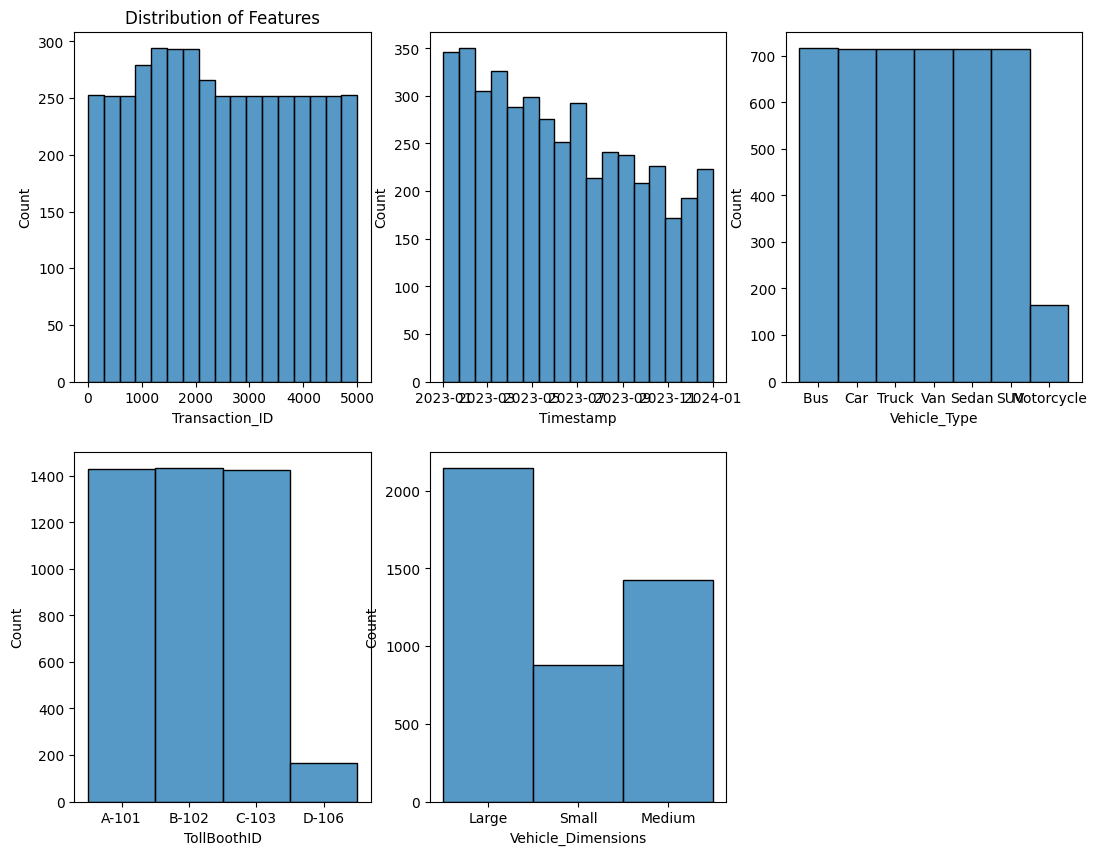

In [ ]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 3, 1)
sns.histplot(df['Transaction_ID'])
plt.title('Distribution of Features')

plt.subplot(2, 3, 2)
sns.histplot(df['Timestamp'])

plt.subplot(2, 3, 3)
sns.histplot(df['Vehicle_Type'])

plt.subplot(2, 3, 4)
sns.histplot(df['TollBoothID'])

plt.subplot(2, 3, 5)
sns.histplot(df['Vehicle_Dimensions'])

<Axes: xlabel='Vehicle_Plate_Number', ylabel='Count'>

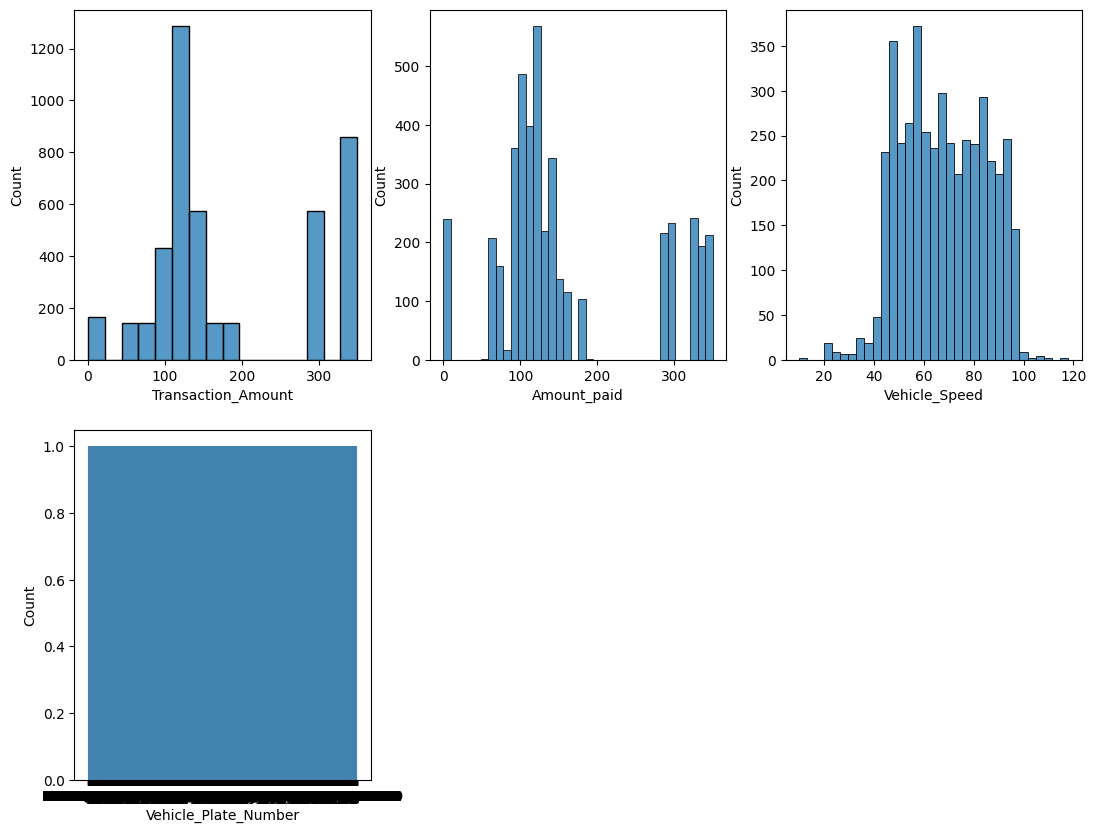

In [ ]:
plt.figure(figsize=(13, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['Transaction_Amount'])

plt.subplot(2, 3, 2)
sns.histplot(df['Amount_paid'])

plt.subplot(2, 3, 3)
sns.histplot(df['Vehicle_Speed'])

plt.subplot(2, 3, 4)
sns.histplot(df['Vehicle_Plate_Number'])


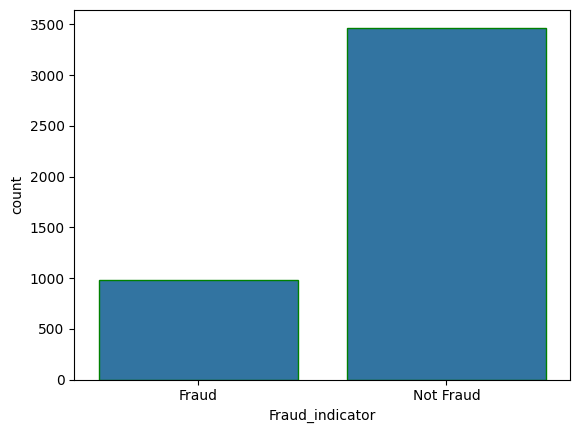

In [ ]:
sns.countplot(x='Fraud_indicator',data=df, edgecolor='green')
plt.show()

Text(0.5, 1.0, 'Amount Paid vs Vehicle Speed')

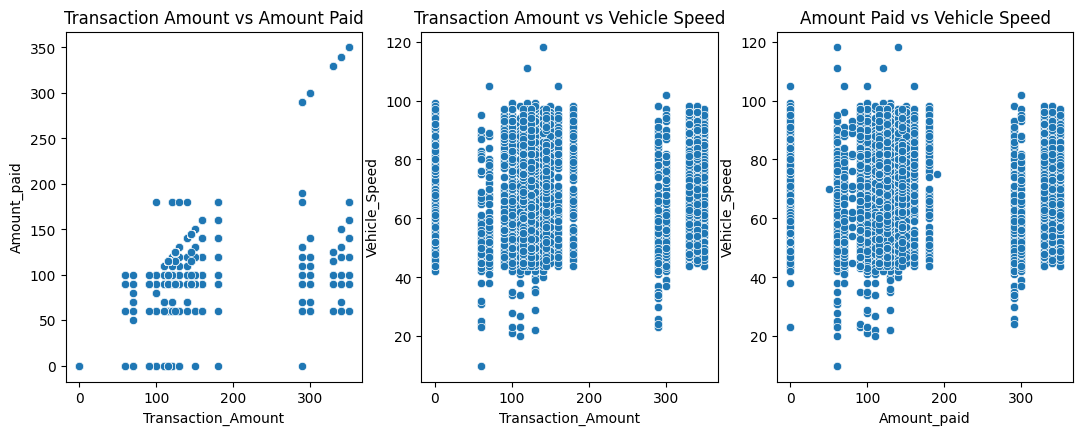

In [ ]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Transaction_Amount', y='Amount_paid')
plt.title('Transaction Amount vs Amount Paid')


plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Transaction_Amount', y='Vehicle_Speed')
plt.title('Transaction Amount vs Vehicle Speed')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Amount_paid', y='Vehicle_Speed')
plt.title('Amount Paid vs Vehicle Speed')


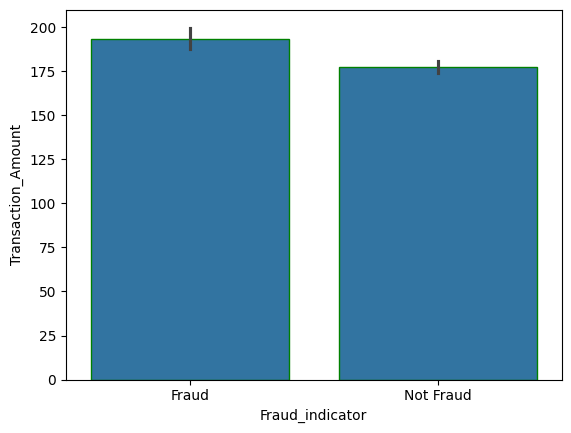

In [ ]:
sns.barplot(x='Fraud_indicator', y='Transaction_Amount', data=df, edgecolor='green')
plt.show()

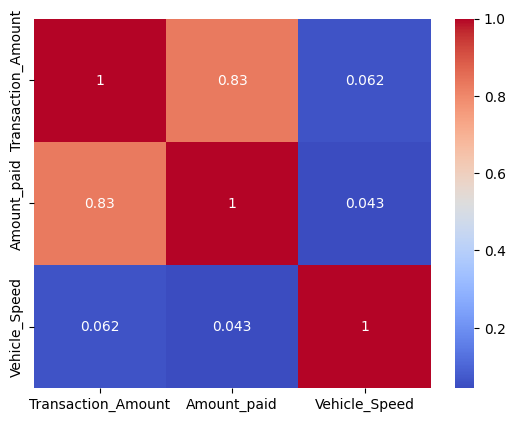

In [ ]:
correlation_matrix = df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

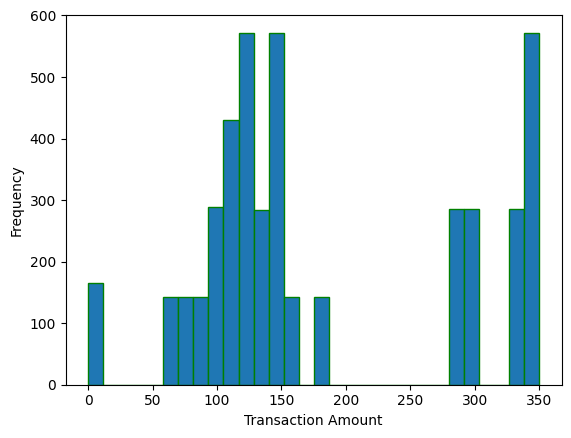

In [ ]:
plt.hist(df['Transaction_Amount'], bins=30, edgecolor='green')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

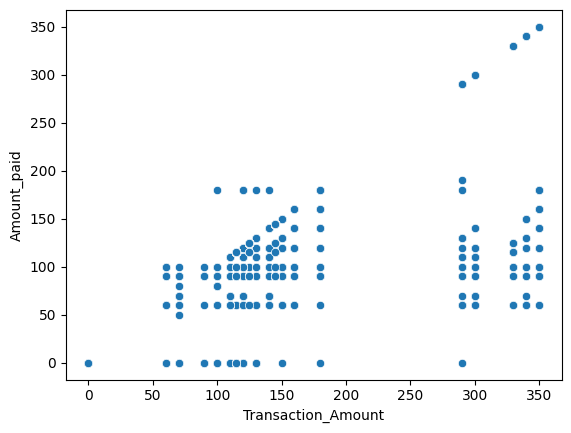

In [ ]:
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', data=df)
plt.show()

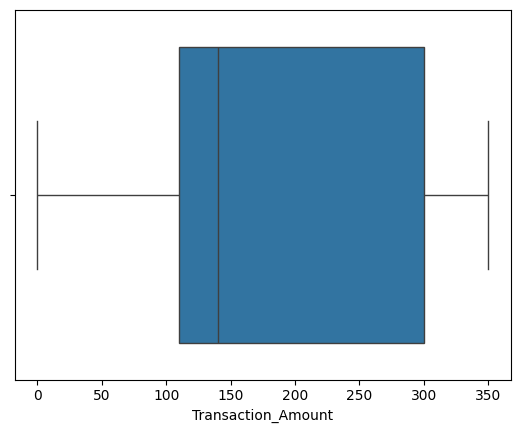

In [ ]:
sns.boxplot(x='Transaction_Amount', data=df)
plt.show()

In [ ]:
selected_features = ['Transaction_Amount', 'Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
89/89 [==============================] - 1s 5ms/step - loss: 0.6068 - accuracy: 0.7054 - val_loss: 0.4633 - val_accuracy: 0.8722
Epoch 2/10
89/89 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8876 - val_loss: 0.2589 - val_accuracy: 0.9157
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9301 - val_loss: 0.1717 - val_accuracy: 0.9565
Epoch 4/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9529 - val_loss: 0.1285 - val_accuracy: 0.9607
Epoch 5/10
89/89 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.9695 - val_loss: 0.1059 - val_accuracy: 0.9817
Epoch 6/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9800 - val_loss: 0.0906 - val_accuracy: 0.9817
Epoch 7/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9828 - val_loss: 0.0818 - val_accuracy: 0.9817
Epoch 8/10
89/89 [==

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.round(y_pred_prob)

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

28/28 [==============================] - 0s 2ms/step
Accuracy: 98.43%
Precision: 0.98
Recall: 1.00
F1 Score: 0.99


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FastagFraudDetection.csv')

In [ ]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
data.dropna(inplace=True)

In [ ]:
if data['Fraud_indicator'].dtype == object:
    data['Fraud_indicator'] = data['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})

X = data.drop(columns=['Transaction_ID', 'Timestamp', 'Fraud_indicator'])
y = data['Fraud_indicator']

categorical_features = ['Vehicle_Dimensions','Vehicle_Type', 'FastagID', 'TollBoothID',
                        'Lane_Type', 'Geographical_Location', 'Vehicle_Plate_Number']
numerical_features = [ 'Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = LogisticRegression(max_iter=1000)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n {cm}')


Accuracy: 0.9573353293413174
Precision: 1.0
Recall: 0.797153024911032
F1 Score: 0.887128712871287
Confusion Matrix:
 [[1055    0]
 [  57  224]]
